## Laboratorium 3 - algorytm *k* Najbliższych Sąsiadów (*k*NN)


### Opis
Celem laboratorium jest implementacja klasyfikatora *k* najbliższych sąsiadów - *k*NN (*k Nearest Neighbors*) oraz zapoznanie się z innymi metrykami klasyfikacji.


### Zbiór danych

Zbiór danych znajduje się w katalogu `dataset/*`. Jest to zmodyfikowany zbiór danych znajdujący się pod adresem: <https://archive.ics.uci.edu/ml/datasets/leaf>.

### Przesyłanie zadań

Wszystkie pliki należy spakować archiwizatorem **zip** i przesłać za pośrednictwem platformy WIKAMP. Poniżej oczekiwana zawartość archiwum:

```
+-- 📂 [IMIE.NAZWISKO].zip
    +-- 📜 Lab03.ipynb
    +-- 📂 dataset
        +-- 📜 dataset.npz
        +-- 📜 ReadMe.pdf
```

### Dodatkowe narzędzia

Dopuszczalne jest korzystanie z bibliotek: `numpy`, `pandas`, `matplotlib`.
Implementacja klasyfikatora powinna być wykonana bez wykorzystania zewnętrznych bibliotek.


### Zadanie

Należy wykonać następujące czynności w celu realizacji niniejszego zadania:
* Wczytaj dane.
* **Zaimplementuj klasyfikator *k* najbliższych sąsiadów (*k*NN)** i uruchom predykcję.
* Opisz jak zmieniają się wyniki klasyfikatora dla różnych wartości *k*, dla różnej liczby klas oraz dla różnej liczby cech.
* Wyświetl tablicę pomyłek (*confusion matrix*). W tym przypadku możesz zastosować gotową implementację z biblioteki `scikit-learn` <https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html>.
* Odszukaj przynajmniej dwie inne (niż accuracy) metryki przytatne w klasyfikacji na stronie <https://scikit-learn.org/stable/modules/model_evaluation.html> i opisz ich wyniki. Wytłumacz czym się różnią i co można z nich odczytać.
* Opisz różnicę wyników klasyfikacji obu algorytmów (NN i *k*NN)?


> UWAGA: Wszystkie wykonane elementy zadania powinny posiadać stosowne komentarze i opisy.

### PONIŻEJ WYKONAJ ZADANIE

In [1]:
import numpy as np
import random
from matplotlib.axes._axes import _log as matplotlib_axes_logger
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy import stats


with open('dataset.npz', 'rb') as f:
    data = np.load(f)
    train, test = data['train'], data['test']

In [2]:
#wybór klas
def get_class(classes):
    for i in range(len(classes)):
        if i == 0:
            new_train = np.array(train[train[:,0] == classes[i]])
            new_test = np.array(test[test[:,0] == classes[i]])
        else:
            new_train = np.vstack((new_train,train[train[:,0] == classes[i]]))
            new_test = np.vstack((new_test,test[test[:,0] == classes[i]]))
    return new_train, new_test

In [3]:
#obliczanie dystansu
def edist(p1, p2, attributes):
    p1_new = []
    p2_new = []
    distance = 0
    
    for i in attributes:
        p1_new.append(p1[i])
        p2_new.append(p2[i])
    
    for i in range(len(p1_new)):
        distance += (p1_new[i] - p2_new[i])**2
        
    return distance**0.5

In [4]:
# funkcja k najbliższych sąsiadów (kNN)
def kNN(train, test, attributes, n):
    classified = np.copy(test)
    for te in range(test.shape[0]):
        distances = np.full((train.shape[0], 2),100.)
        for tr in range(train.shape[0]):
            dist = edist(test[te], train[tr], attributes)
            distances[tr,0] = dist
            distances[tr,1] = train[tr,0]
        distances = distances[distances[:,0].argsort()]
        x = stats.mode(distances[0:n,1])
        classified[te,0] = x[0][0]
            
    return classified

In [5]:
def my_plot(attributes, classes, c_train, c_test):
    plt.rcParams["figure.figsize"] = (10,10)
    plt.figure()
    plt.title("Próbki")
    plt.xlabel(attributes[0])
    plt.ylabel(attributes[1])

    class_name ={1:'Quercus suber',
                 2:'Salix atrocinera',
                 3: 'Populus nigra',
                 4: 'Alnus sp.',
                 5: 'Quercus robur',
                 6:'Crataegus monogyna',
                 7:'Ilex aquifolium',
                 8: 'Nerium oleander',
                 9:'Betula pubescens',
                 10:'Tilia tomentosa',
                 11:'Acer palmatum',
                 12:'Celtis sp.',
                 13:'Corylus avellana',
                 14:'Castanea sativa',
                 15:'Populus alba',
                 16:'Acer negundo',
                 17:'Taxus bacatta',
                 18:'Papaver sp.',
                 19:'Polypolium vulgare',
                 20:'Pinus sp.'
                } 

    for cl in classes:
        random.seed(cl)
        color = (random.randint(0,80)/100,random.randint(0,80)/100,random.randint(0,80)/100)
        plt.scatter(x=c_train[c_train[:,0] == cl][:,attributes[0]],
                    y=c_train[c_train[:,0] == cl][:,attributes[1]],
                    label='Train class: '+class_name[cl],
                    marker = '.',
                    c=color,
                    alpha=0.8
                   )
    
    for cl in classes:
        random.seed(cl)
        color = (random.randint(0,80)/100,random.randint(0,80)/100,random.randint(0,80)/100)
        plt.scatter(x=c_test[c_test[:,0] == cl][:,attributes[0]],
                    y=c_test[c_test[:,0] == cl][:,attributes[1]],
                    label='Pred class: '+class_name[cl],
                    marker='o',
                    c=color,
                    alpha=0.2
                    )
        
    plt.legend()
    plt.show()

### -Najlepsze wyniki otrzymuje się gdy k=3, powyżej parametry spadaja, poniżej również, może być to spowodowane za małym lub za dużym obszarem poszukiwań i przypisywania do sąsiada 
### -Wraz ze wzrostem atrybutów i klas maleje jakość wskźników. Jednak gdy zwiększona zostanie tylko ilość atrybutów jakość klasyfikatora rośnie
### -Algorytm najbliższego sąsiada umożliwia klasyfikowanie próbek w oparciu o kilka atrybutów i zostaje wybrany ten który najbardziej jest zbliżony do próbki testowanej. Przeszukuje on we wskazanym obszarze obiektów które występują najczęściej a na podstawie tego obiektowi testowem jest przypisywana grupa przynależności

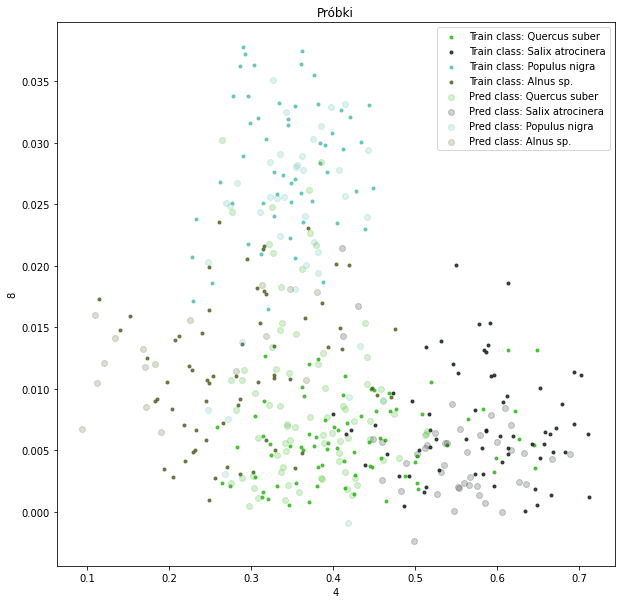

Accuracy: 0.7954545454545454
Balanced accuracy: 0.7897727272727273
Precision score: 0.7954545454545454


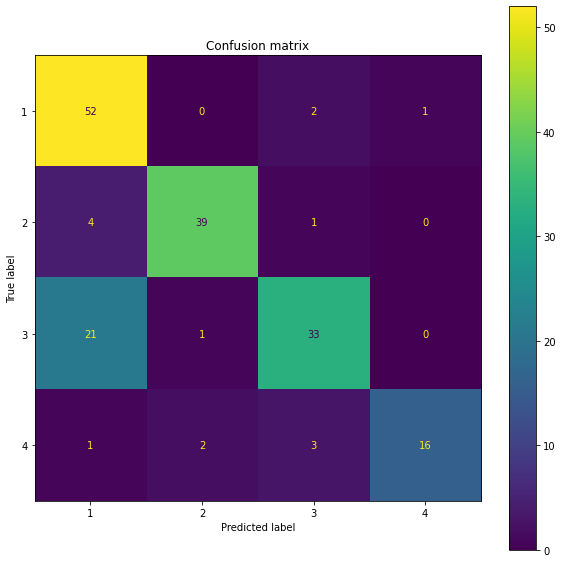

In [6]:
matplotlib_axes_logger.setLevel('ERROR')
# atrybut
attributes = [4,8,11,13,15]
# listek
classes=[1,2,3,4]
# "zasieg poszukiwań"
k=3

#tworzenie podzbiorów dla listków
train,test = get_class(classes)
#klasyfikacja zbioru testowego na podstawie treningowego
knn = kNN(train,test,attributes, k)
#Wyświetlenie wyników
my_plot(attributes, classes, train, knn)


# Macierz pomyłek informuje nas o jakości zaimplementowanego klasyfikatora z reguły korzysta się dla wartości binarnych
cm = metrics.confusion_matrix(test[:,0], knn[:,0],labels=classes)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot()
plt.title('Confusion matrix')

acc = metrics.accuracy_score(test[:,0], knn[:,0])
bacc = metrics.balanced_accuracy_score(test[:,0], knn[:,0])
ps = metrics.precision_score(test[:,0], knn[:,0], average='micro')

# ACC = (TP+TN)/(P+N) => jest to wskaźnik, który informuje nas o poprawności klasyfikatora ile poprawnie pozytywnych próbek do całkowitej ilości próbek
print('Accuracy:',acc)
# BACC = (Sensitivity+Specificity)/2 => wykorzystuje się go głownie przy danych niezbalansowanych gdy jedna klasa występuje częściej niż pozostąłe
print('Balanced accuracy:',bacc)
# Precision = TP/(TP + FP) => liczy tylko ilość poprawnie sklasyfikowanych pozytywów
print('Precision score:',ps)

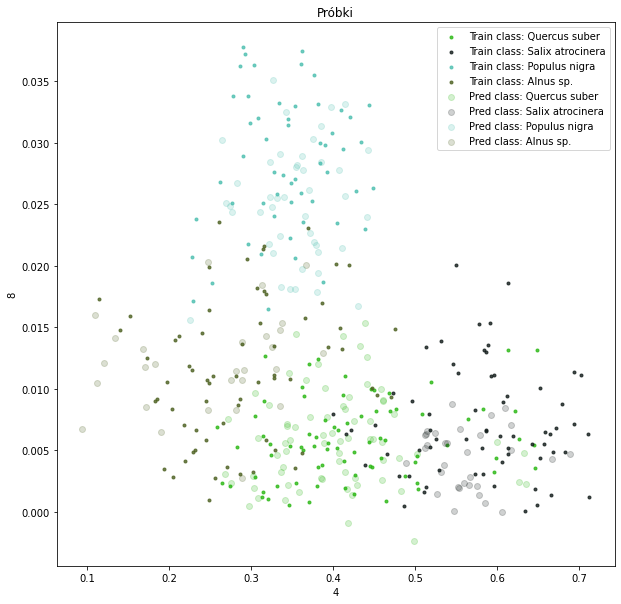

Accuracy: 0.7443181818181818
Balanced accuracy: 0.7181818181818181
Precision score: 0.7443181818181818


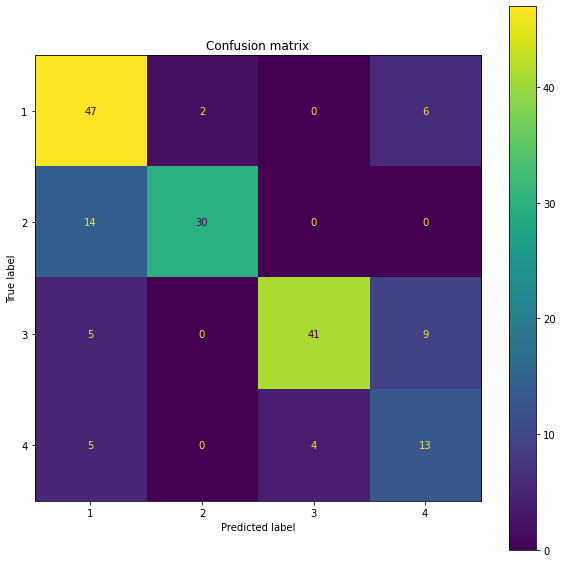

In [7]:
matplotlib_axes_logger.setLevel('ERROR')
# atrybut
attributes = [4,8]
# listek
classes=[1,2,3,4]
# "zasieg poszukiwań"
k=4

#tworzenie podzbiorów dla listków
train,test = get_class(classes)
#klasyfikacja zbioru testowego na podstawie treningowego
knn = kNN(train,test,attributes, k)
#Wyświetlenie wyników
my_plot(attributes, classes, train, knn)


# Macierz pomyłek informuje nas o jakości zaimplementowanego klasyfikatora z reguły korzysta się dla wartości binarnych
cm = metrics.confusion_matrix(test[:,0], knn[:,0],labels=classes)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot()
plt.title('Confusion matrix')

acc = metrics.accuracy_score(test[:,0], knn[:,0])
bacc = metrics.balanced_accuracy_score(test[:,0], knn[:,0])
ps = metrics.precision_score(test[:,0], knn[:,0], average='micro')

# ACC = (TP+TN)/(P+N) => jest to wskaźnik, który informuje nas o poprawności klasyfikatora ile poprawnie pozytywnych próbek do całkowitej ilości próbek
print('Accuracy:',acc)
# BACC = (Sensitivity+Specificity)/2 => wykorzystuje się go głownie przy danych niezbalansowanych gdy jedna klasa występuje częściej niż pozostąłe
print('Balanced accuracy:',bacc)
# Precision = TP/(TP + FP) => liczy tylko ilość poprawnie sklasyfikowanych pozytywów
print('Precision score:',ps)